In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
%%time
G = nx.read_edgelist("data/com-youtube/out.com-youtube", comments="%", nodetype=int)


CPU times: user 15.5 s, sys: 564 ms, total: 16 s
Wall time: 16 s


In [13]:
%%time
degree_dict = dict(G.degree())
# print("\n\nNodes degrees: \n{}".format(G.degree()))
print("\n\nMax degree: \n{}".format(max(degree_dict.values())))
print("\n\nNode [3] degree: \n{}".format(G.degree([3])))
avg_degree = np.mean(list(degree_dict.values()))
print("\n\nAvg degree: \n   {}".format(avg_degree))



Max degree: 
28754


Node [3] degree: 
[(3, 12)]


Avg degree: 
   5.265045951590022
CPU times: user 708 ms, sys: 24 ms, total: 732 ms
Wall time: 729 ms


In [3]:
%%time
print("\n\nAvg betweenness: \n{}".format(
        np.mean(list(nx.algorithms.centrality.betweenness_centrality(G,k=1).values()))))
# print("\n\nBetweenness centrality: \n{}".format(
#         nx.algorithms.centrality.betweenness_centrality(G)))



Avg betweenness: 
3.614821855301841e-06
CPU times: user 2min 24s, sys: 140 ms, total: 2min 24s
Wall time: 2min 24s


In [7]:
%%time
print("\n\nAvg closeness centrality: \n{}".format(
        np.mean(list(nx.algorithms.centrality.closeness_centrality(G).values()))))
# print("\n\nCloseness centrality: \n{}".format(
#         nx.algorithms.centrality.closeness_centrality(G)))

KeyboardInterrupt: 

In [8]:
%%time
print("\n\nAvg shortest path betweenness centrality: \n{}".format(
        np.mean(list(nx.algorithms.centrality.betweenness_centrality(G).values()))))
# print("\n\nShortest path betweenness centrality: \n{}".format(
#         nx.algorithms.centrality.betweenness_centrality(G)))

KeyboardInterrupt: 

In [14]:
%%time
print("\n\nShortest path [1]=>[82]: \n{}".format(
        nx.algorithms.shortest_paths.generic.shortest_path(G, source=1, target=82)))



Shortest path [1]=>[82]: 
[1, 2, 82]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 185 µs


In [15]:
%%time
pgrank = nx.algorithms.link_analysis.pagerank_alg.pagerank(G, alpha=0.85)
# print("\n\nPage rank: \n{}".format(pgrank))
print("\n\nPage rank max: \n{}".format(max(pgrank.values())))



Page rank max: 
0.006388180558387509
CPU times: user 1min 19s, sys: 1.66 s, total: 1min 21s
Wall time: 1min 21s


In [16]:
%%time
print("\n\nAvg clustering coefficient: \n{}".format(nx.algorithms.cluster.average_clustering(G)))
# print("\n\nClustering coefficient: \n{}".format(nx.algorithms.cluster.clustering(G)))



Avg clustering coefficient: 
0.08080227776187864
CPU times: user 4min 8s, sys: 68 ms, total: 4min 8s
Wall time: 4min 8s


In [50]:
%%time
print("\n\nDiameter: \n{}".format(nx.diameter(G)))



Diameter: 
5
CPU times: user 72 ms, sys: 0 ns, total: 72 ms
Wall time: 69.3 ms


In [17]:
%%time
print("\n\nNumber of connected components: \n{}".format(nx.number_connected_components(G)))



Number of connected components: 
1
CPU times: user 2.58 s, sys: 84 ms, total: 2.66 s
Wall time: 2.66 s


In [18]:
%%time
print("\n\nNetwork density: \n{}".format(nx.density(G)))



Network density: 
4.639260713241579e-06
CPU times: user 560 ms, sys: 0 ns, total: 560 ms
Wall time: 562 ms


CPU times: user 60 ms, sys: 12 ms, total: 72 ms
Wall time: 64.1 ms


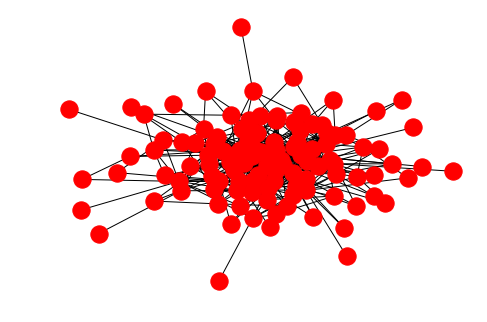

In [53]:
%%time
nx.draw_spring(G)

CPU times: user 104 ms, sys: 12 ms, total: 116 ms
Wall time: 102 ms


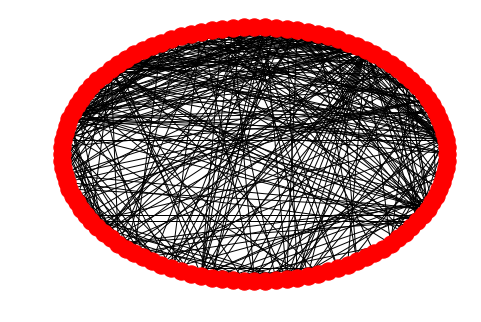

In [54]:
%%time
nx.draw_circular(G)


Degree distribution
CPU times: user 44 ms, sys: 0 ns, total: 44 ms
Wall time: 44 ms


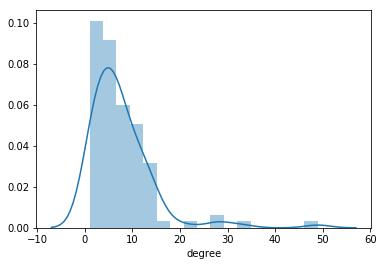

In [55]:
%%time
degree_dict = dict(G.degree())
print("\nDegree distribution")
sns.distplot(list(degree_dict.values()),axlabel="degree");


Clustering coefficient distribution
CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 45.4 ms


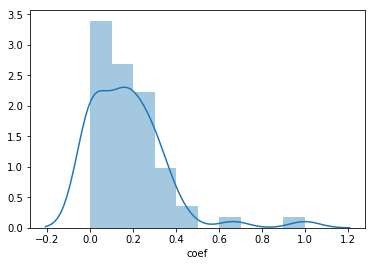

In [56]:
%%time
print("\nClustering coefficient distribution")
sns.distplot(list(nx.algorithms.cluster.clustering(G).values()),axlabel="coef");


Shortest paths distribution
CPU times: user 284 ms, sys: 256 ms, total: 540 ms
Wall time: 174 ms


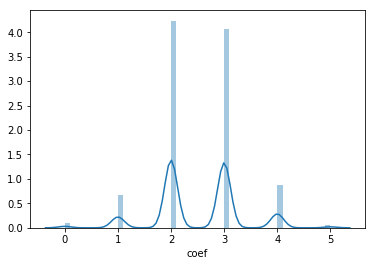

In [57]:
%%time
print("\nShortest paths distribution")
# print(list(itertools.chain(*list(map(lambda x: x[1].values(),nx.all_pairs_shortest_path_length(G))))))
sns.distplot(list(itertools.chain(*list(map(lambda x: x[1].values(),nx.all_pairs_shortest_path_length(G))))),axlabel="coef");

In [58]:
%%time
A = nx.nx_agraph.to_agraph(G)
A.layout()
A.draw('A.png')

CPU times: user 28 ms, sys: 16 ms, total: 44 ms
Wall time: 174 ms
